# Data Preprocessing & LSTM Model
- Data cleaning
- Data Transformations
- Feature selection
- Normalization

In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
#import pandas_profiling
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import xgboost as xgb # for XGBoost algorith
from sklearn.ensemble import RandomForestRegressor # for RandomForest regressor
# LSTM imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# for scaling
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468


# PART 1: Data Cleaning 

In [5]:
# convert to date time
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2017-12-31 00:00:00+00:00', '2017-12-31 00:10:00+00:00',
               '2017-12-31 00:20:00+00:00', '2017-12-31 00:30:00+00:00',
               '2017-12-31 00:40:00+00:00', '2017-12-31 00:50:00+00:00',
               '2017-12-31 01:00:00+00:00', '2017-12-31 01:10:00+00:00',
               '2017-12-31 01:20:00+00:00', '2017-12-31 01:30:00+00:00',
               ...
               '2020-03-30 22:20:00+00:00', '2020-03-30 22:30:00+00:00',
               '2020-03-30 22:40:00+00:00', '2020-03-30 22:50:00+00:00',
               '2020-03-30 23:00:00+00:00', '2020-03-30 23:10:00+00:00',
               '2020-03-30 23:20:00+00:00', '2020-03-30 23:30:00+00:00',
               '2020-03-30 23:40:00+00:00', '2020-03-30 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', length=118224, freq=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-null   float64
 11  GeneratorWinding2Temperature  62449 non-null   float64
 12

## Check Data Duplicates

In [7]:
len(df)

118224

In [8]:
# Check for duplications
df.duplicated().sum()

23039

In [9]:
# drop the duplicates
df.drop_duplicates(inplace=True)

In [10]:
len(df)

95185

## 1.2 Missing data & Unuseful Column

In [11]:
df.isna().sum()

ActivePower                       561
AmbientTemperatue                1487
BearingShaftTemperature         32805
Blade1PitchAngle                53198
Blade2PitchAngle                53303
Blade3PitchAngle                53303
ControlBoxTemperature           33163
GearboxBearingTemperature       32783
GearboxOilTemperature           32755
GeneratorRPM                    32898
GeneratorWinding1Temperature    32766
GeneratorWinding2Temperature    32744
HubTemperature                  32917
MainBoxTemperature              32816
NacellePosition                 23077
ReactivePower                     563
RotorRPM                        33066
TurbineStatus                   32426
WTG                                 0
WindDirection                   23077
WindSpeed                         716
dtype: int64

In [12]:
df = df.drop('WTG', axis=1)

In [13]:
df = df.drop('ControlBoxTemperature', axis=1)

In [14]:
# numeric, data is either skew to left or right 
df.skew(axis = 0, skipna = True)

ActivePower                       0.710127
AmbientTemperatue                 0.389485
BearingShaftTemperature          -1.140746
Blade1PitchAngle                  2.416123
Blade2PitchAngle                  2.442856
Blade3PitchAngle                  2.442856
GearboxBearingTemperature        -0.729546
GearboxOilTemperature            -0.629844
GeneratorRPM                     -0.790057
GeneratorWinding1Temperature      0.750428
GeneratorWinding2Temperature      0.759219
HubTemperature                   -1.301276
MainBoxTemperature               -0.497253
NacellePosition                   0.078158
ReactivePower                     1.122515
RotorRPM                         -0.802987
TurbineStatus                   177.444303
WindDirection                     0.078158
WindSpeed                         0.768387
dtype: float64

In [15]:
df = df.dropna(subset=['ActivePower', "WindSpeed"])

In [16]:
# Fill NaN with the median
for label, content in df.items():
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean (Data is skewed)
            df[label] = content.fillna(content.median())

In [17]:
# Exclude negative values for ActivePower
df =  df[df['ActivePower']>=0]

In [18]:
len(df)

78681

In [19]:
len(df)

78681

In [20]:
df.isna().sum()

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
dtype: int64

In [23]:
# Save to file
#df.to_csv('v2_cleaned_Turbine_data.csv')

In [2]:
# Read the cleaned data file
df1 = pd.read_csv('v2_cleaned_Turbine_data.csv')
df1

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,64.944908,37.003815,39.500000,252.00,3.976499,10.086061,2.0,252.00,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,64.944908,37.003815,39.500000,255.00,11.091660,10.086061,2.0,255.00,3.424814
2,2018-01-01 06:50:00+00:00,40.889650,28.984758,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,64.944908,37.003815,39.500000,264.75,4.234497,10.086061,2.0,264.75,3.507172
3,2018-01-01 10:40:00+00:00,34.398111,30.282058,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,64.944908,37.003815,39.500000,283.75,5.347792,10.086061,2.0,283.75,3.442212
4,2018-01-01 12:00:00+00:00,29.797653,29.333519,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,64.944908,37.003815,39.500000,274.00,6.022326,10.086061,2.0,274.00,3.031363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78676,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.00,13.775785,9.234004,2.0,178.00,3.533445
78677,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.00,8.088928,9.229370,2.0,178.00,3.261231
78678,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.00,4.355978,9.236802,2.0,178.00,3.331839
78679,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.00,12.018077,9.237374,2.0,190.00,3.284468


In [3]:
df1.rename(columns = {'Unnamed: 0':'timestamp'}, inplace = True)
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [4]:
df1['year']   = df1['timestamp'].dt.year
df1['month']  = df1['timestamp'].dt.month
df1['YearMonth'] = df1['timestamp'].apply(lambda x: x.strftime("%Y-%m"))
df1['day']    = df1['timestamp'].dt.day
df1['hour']   = df1['timestamp'].dt.hour
df1['minute'] = df1['timestamp'].dt.minute
df1['YearMonthDay'] = df1['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))
df1.set_index('timestamp')

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,TurbineStatus,WindDirection,WindSpeed,year,month,YearMonth,day,hour,minute,YearMonthDay
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:20:00+00:00,26.212347,28.696304,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,2.0,252.00,3.042750,2018,1,2018-01,1,6,20,2018-01-01
2018-01-01 06:40:00+00:00,59.632658,29.052567,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,2.0,255.00,3.424814,2018,1,2018-01,1,6,40,2018-01-01
2018-01-01 06:50:00+00:00,40.889650,28.984758,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,2.0,264.75,3.507172,2018,1,2018-01,1,6,50,2018-01-01
2018-01-01 10:40:00+00:00,34.398111,30.282058,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,2.0,283.75,3.442212,2018,1,2018-01,1,10,40,2018-01-01
2018-01-01 12:00:00+00:00,29.797653,29.333519,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,2.0,274.00,3.031363,2018,1,2018-01,1,12,0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,...,2.0,178.00,3.533445,2020,3,2020-03,30,23,10,2020-03-30
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,...,2.0,178.00,3.261231,2020,3,2020-03,30,23,20,2020-03-30
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,...,2.0,178.00,3.331839,2020,3,2020-03,30,23,30,2020-03-30


In [5]:
df_day = df1.groupby(by=['YearMonthDay']).mean()

In [6]:
df_day.isna().sum()

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
year                            0
month                           0
day                             0
hour                            0
minute                          0
dtype: int64

In [7]:
df_day['ActivePower'].isna().sum()

0

## LSTM
- Training 684 days, Validation 0.2%
- Testing with 60 days

- 35 days of previous data to forecast the next 30 days 

In [12]:
df_day

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,year,month,day,hour,minute
YearMonthDay,,,,,,,,,,,,,,,,,,,,,
2018-01-01,366.223561,25.528849,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,74.042120,10.086061,2.000000,267.766892,5.263797,2018.0,1.0,1.0,16.918919,25.405405
2018-01-02,462.550740,25.357526,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,93.555723,10.086061,2.000000,260.821141,5.390719,2018.0,1.0,2.0,14.048077,23.942308
2018-01-03,454.417752,24.379363,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,91.627843,10.086061,2.000000,277.761366,5.295225,2018.0,1.0,3.0,11.690722,24.226804
2018-01-04,369.952190,24.912347,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,74.360621,10.086061,2.000000,276.967700,5.094994,2018.0,1.0,4.0,11.722628,24.598540
2018-01-05,319.446595,23.535679,42.921070,0.390534,0.885209,0.885209,64.843517,57.189826,1123.212640,65.733543,...,64.366148,10.086061,2.000000,285.208347,4.915224,2018.0,1.0,5.0,11.876289,25.051546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,732.042233,29.991142,46.851910,0.329317,0.771003,0.771003,66.892063,58.317562,1297.720061,78.444640,...,120.420349,11.635693,2.000000,168.151865,6.245735,2020.0,3.0,26.0,12.716535,24.960630
2020-03-27,728.896074,30.614304,46.115403,0.203444,0.610377,0.610377,66.280149,57.581506,1298.868428,75.580358,...,110.689811,11.649555,2.035211,178.605831,6.207374,2020.0,3.0,27.0,11.633803,25.281690
2020-03-28,874.011580,30.000025,47.417985,0.866849,1.336831,1.336831,67.005384,58.315145,1267.788891,77.820369,...,140.359887,11.372685,89.763636,182.870152,6.776972,2020.0,3.0,28.0,13.590909,25.000000


In [13]:
# train is from 0 to 683 test is from 683 to 749
train, test = df_day['ActivePower'][0:683], df_day['ActivePower'][683:749]
train.shape,test.shape

((683,), (65,))

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [15]:
# define a function to create X and y  sets from the  training dataset
# still need to reshape input to be 3D [samples, timesteps, features]

def split_X_y(df, n_steps_in, n_steps_out):
    X, y = [],[]
    for i in range(len(df)):
        # find the end of this pattern
        end_index = i + n_steps_in
        out_end_index = end_index + n_steps_out
        # check if we are beyond the sequence
        if out_end_index > len(df):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = df[i:end_index], df[end_index:out_end_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
# choose a number of time steps
n_steps_in, n_steps_out = 35, 30
# split into samples
X_train, y_train = split_X_y(train, n_steps_in, n_steps_out)
X_test, y_test   = split_X_y(test, n_steps_in, n_steps_out)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((619, 35, 1), (619, 30, 1), (1, 35, 1), (1, 30, 1))

In [17]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test  = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((619, 35, 1), (619, 30, 1), (1, 35, 1), (1, 30, 1))

In [138]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(n_steps_out)) 


In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 35, 128)           66560     
                                                                 
 dropout_4 (Dropout)         (None, 35, 128)           0         
                                                                 
 batch_normalization_4 (Batc  (None, 35, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                      

In [112]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) 
#  early stopping
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# fit network 
history = model.fit(X_train, y_train, epochs=200,verbose=0, batch_size=32, validation_split=0.2, shuffle=False, callbacks=[callbacks]) 

Epoch 84: early stopping


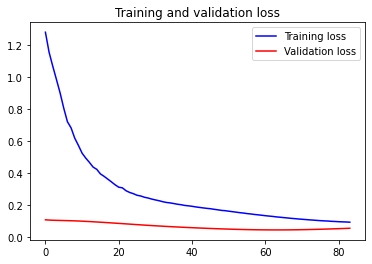

In [113]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [114]:
pred = model.predict(X_test, verbose=0)
pred = scaler.inverse_transform(pred)

In [115]:
df_final = pd.DataFrame(data={'Actuals':df_day['ActivePower'][718:748], 'Predictions':pred[0][0:30]}, index = df_day[718:748].index) 
df_final

,Actuals,Predictions
YearMonthDay,,
2020-03-01,443.058496,558.786926
2020-03-02,390.027361,678.490417
2020-03-03,341.133560,560.452515
2020-03-04,122.348957,501.952179
2020-03-05,676.893151,712.264526
2020-03-06,345.379836,551.626953
2020-03-07,516.674962,599.306885
2020-03-08,629.447133,704.042358
2020-03-09,673.519002,650.131653


In [116]:
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))

The Coefficient of determination (R-squared) = -0.180
The mean absolute error (MAE)                = 171.59
The RMSE error (RMSE)                        = 199.79


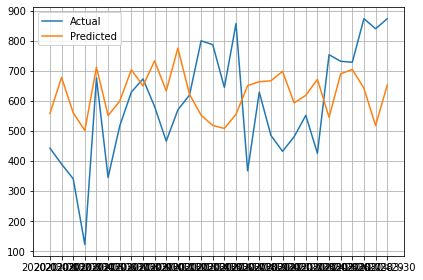

In [117]:
# plot Actual, Predicted
plt.plot(df_final['Actuals'], label='Actual')
plt.plot(df_final['Predictions'], label='Predicted')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## Keras Tuner Hyperparameter Tuning (Random Search)

In [135]:
#pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
def model_builder(hp):
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),activation='relu',return_sequences=True,
                   input_shape=(n_steps_in, n_features)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(BatchNormalization())
    #for i in range(hp.Int('n_layers', 1, 4)):
    #    model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32),activation='relu'))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(BatchNormalization())
    
    model.add(Dense(n_steps_out, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01,0.001,0.0001])
    model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics = ['mse'])
    
    return model

In [68]:
from tensorflow import keras
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
tuner= RandomSearch(
       model_builder,
        objective='mse',
        max_trials=5,
        executions_per_trial=1,
        overwrite = True)

In [69]:
import tensorflow as tf
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(
        X_train, 
        y_train,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[stop_early]
)

Trial 5 Complete [00h 03m 01s]
mse: 0.02196064591407776

Best mse So Far: 0.02196064591407776
Total elapsed time: 00h 06m 54s
INFO:tensorflow:Oracle triggered exit


In [70]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal numbers of hyperparameter: 
Input unit = {best_hps.get('input_unit')} 
Second layer unit = {best_hps.get('layer_2_neurons')}
Learning rate = {best_hps.get('learning_rate')}
Drop out rate = {best_hps.get('Dropout_rate')}
Dense layer Activation function = {best_hps.get('dense_activation' )}""")


Optimal numbers of hyperparameter: 
Input unit = 192 
Second layer unit = 480
Learning rate = 0.001
Drop out rate = 0.2
Dense layer Activation function = sigmoid


In [71]:
model = tuner.hypermodel.build(best_hps)

In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(monitor = 'val_loss',mode='min', verbose=1, patience=20),
    ModelCheckpoint('lstm.h5', verbose=1, save_best_only=True)#, save_weights_only=True
]


In [73]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200,verbose=0, batch_size=32, 
                    validation_split=0.2, shuffle=False,callbacks=callbacks) 


Epoch 1: val_loss improved from inf to 0.09683, saving model to lstm.h5

Epoch 2: val_loss improved from 0.09683 to 0.09567, saving model to lstm.h5

Epoch 3: val_loss improved from 0.09567 to 0.09457, saving model to lstm.h5

Epoch 4: val_loss improved from 0.09457 to 0.09349, saving model to lstm.h5

Epoch 5: val_loss improved from 0.09349 to 0.09243, saving model to lstm.h5

Epoch 6: val_loss improved from 0.09243 to 0.09139, saving model to lstm.h5

Epoch 7: val_loss improved from 0.09139 to 0.09045, saving model to lstm.h5

Epoch 8: val_loss improved from 0.09045 to 0.08953, saving model to lstm.h5

Epoch 9: val_loss improved from 0.08953 to 0.08871, saving model to lstm.h5

Epoch 10: val_loss improved from 0.08871 to 0.08798, saving model to lstm.h5

Epoch 11: val_loss improved from 0.08798 to 0.08737, saving model to lstm.h5

Epoch 12: val_loss improved from 0.08737 to 0.08676, saving model to lstm.h5

Epoch 13: val_loss improved from 0.08676 to 0.08632, saving model to lstm.h5

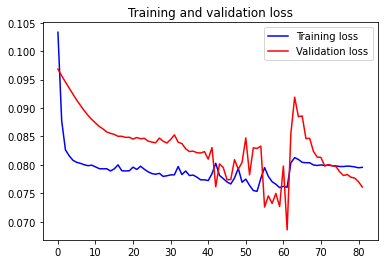

In [74]:
## Plot the accuracy and loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [75]:
# demonstrate prediction
prediction = model.predict(X_test, verbose=0)
#print(scaler.inverse_transform(prediction))
pred = scaler.inverse_transform(prediction)

In [77]:
df_final = pd.DataFrame(data={'Actuals':df_day['ActivePower'][718:748], 'Predictions':pred[0][0:30]}, index = df_day[718:748].index) 
df_final

,Actuals,Predictions
YearMonthDay,,
2020-03-01,443.058496,587.402222
2020-03-02,390.027361,601.055664
2020-03-03,341.133560,615.887878
2020-03-04,122.348957,668.274902
2020-03-05,676.893151,667.348328
2020-03-06,345.379836,686.835083
2020-03-07,516.674962,696.296570
2020-03-08,629.447133,724.408386
2020-03-09,673.519002,735.486389


In [78]:
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))

The mean absolute error (MAE)                = 196.86
The RMSE error (RMSE)                        = 246.03


## Keras Tuner Hyperparameter Tuning (Bayesian Optimizer)


In [18]:
def model_builder(hp):
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),activation='relu',return_sequences=True,
                   input_shape=(n_steps_in, n_features)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(BatchNormalization())
    #for i in range(hp.Int('n_layers', 1, 4)):
    #    model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32),activation='relu'))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(BatchNormalization())
    
    model.add(Dense(n_steps_out, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01,0.001,0.0001])
    model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics = ['mse'])
    
    return model

In [19]:
from tensorflow import keras
import keras_tuner as kt
from kerastuner.tuners import BayesianOptimization
tuner= BayesianOptimization(
       model_builder,
        objective='mse',
        max_trials=5,
        overwrite = True)

In [20]:
import tensorflow as tf
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(
        X_train, 
        y_train,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[stop_early]
)

Trial 5 Complete [00h 03m 54s]
mse: 0.10979647934436798

Best mse So Far: 0.01962932012975216
Total elapsed time: 00h 08m 01s
INFO:tensorflow:Oracle triggered exit


In [21]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal numbers of hyperparameter: 
Input unit = {best_hps.get('input_unit')} 
Second layer unit = {best_hps.get('layer_2_neurons')}
Learning rate = {best_hps.get('learning_rate')}
Drop out rate = {best_hps.get('Dropout_rate')}
Dense layer Activation function = {best_hps.get('dense_activation' )}""")


Optimal numbers of hyperparameter: 
Input unit = 128 
Second layer unit = 448
Learning rate = 0.001
Drop out rate = 0.30000000000000004
Dense layer Activation function = sigmoid


In [22]:
model = tuner.hypermodel.build(best_hps)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(monitor = 'val_loss',mode='min', verbose=1, patience=20),
    ModelCheckpoint('lstm.h5', verbose=1, save_best_only=True)#, save_weights_only=True
]


In [24]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200,verbose=0, batch_size=32, 
                    validation_split=0.2, shuffle=False,callbacks=callbacks) 


Epoch 1: val_loss improved from inf to 0.09674, saving model to lstm.h5

Epoch 2: val_loss improved from 0.09674 to 0.09555, saving model to lstm.h5

Epoch 3: val_loss improved from 0.09555 to 0.09422, saving model to lstm.h5

Epoch 4: val_loss improved from 0.09422 to 0.09310, saving model to lstm.h5

Epoch 5: val_loss improved from 0.09310 to 0.09204, saving model to lstm.h5

Epoch 6: val_loss improved from 0.09204 to 0.09107, saving model to lstm.h5

Epoch 7: val_loss improved from 0.09107 to 0.09013, saving model to lstm.h5

Epoch 8: val_loss improved from 0.09013 to 0.08925, saving model to lstm.h5

Epoch 9: val_loss improved from 0.08925 to 0.08846, saving model to lstm.h5

Epoch 10: val_loss improved from 0.08846 to 0.08773, saving model to lstm.h5

Epoch 11: val_loss improved from 0.08773 to 0.08708, saving model to lstm.h5

Epoch 12: val_loss improved from 0.08708 to 0.08657, saving model to lstm.h5

Epoch 13: val_loss improved from 0.08657 to 0.08607, saving model to lstm.h5

In [25]:
prediction = model.predict(X_test, verbose=0)
pred = scaler.inverse_transform(prediction)

In [26]:
df_final = pd.DataFrame(data={'Actuals':df_day['ActivePower'][718:748], 'Predictions':pred[0][0:30]}, index = df_day[718:748].index) 
df_final

,Actuals,Predictions
YearMonthDay,,
2020-03-01,443.058496,739.927368
2020-03-02,390.027361,736.149170
2020-03-03,341.133560,741.497803
2020-03-04,122.348957,726.319092
2020-03-05,676.893151,749.628174
2020-03-06,345.379836,728.820435
2020-03-07,516.674962,769.337891
2020-03-08,629.447133,720.895386
2020-03-09,673.519002,746.561035


In [27]:
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))

The mean absolute error (MAE)                = 200.37
The RMSE error (RMSE)                        = 249.76


##  Training/validation/testing dataset partitions 

In [39]:
# train is from 0 to 708 test is from 708 to 749
train, test = df_day['ActivePower'][0:708], df_day['ActivePower'][708:749]
train.shape,test.shape

((708,), (40,))

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [13]:
# define a function to create X and y  sets from the  training dataset
# still need to reshape input to be 3D [samples, timesteps, features]

def split_X_y(df, n_steps_in, n_steps_out):
    X, y = [],[]
    for i in range(len(df)):
        # find the end of this pattern
        end_index = i + n_steps_in
        out_end_index = end_index + n_steps_out
        # check if we are beyond the sequence
        if out_end_index > len(df):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = df[i:end_index], df[end_index:out_end_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [27]:
# choose a number of time steps
n_steps_in, n_steps_out = 30, 10
# split into samples
X_train, y_train = split_X_y(train, n_steps_in, n_steps_out)
X_test, y_test   = split_X_y(test, n_steps_in, n_steps_out)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((669, 30, 1), (669, 10, 1), (1, 30, 1), (1, 10, 1))

In [28]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test  = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((669, 30, 1), (669, 10, 1), (1, 30, 1), (1, 10, 1))

In [32]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(n_steps_out)) 


In [33]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) 

In [34]:
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, epochs=200,verbose=0, batch_size=32, validation_split=0.2, 
                    shuffle=False, callbacks=[callbacks]) 

Epoch 74: early stopping


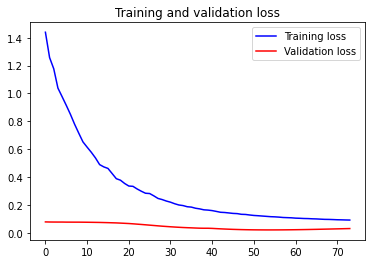

In [35]:
## Plot the accuracy and loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
pred = model.predict(X_test, verbose=0)
pred = scaler.inverse_transform(pred)

In [37]:
df_final = pd.DataFrame(data={'Actuals':df_day['ActivePower'][738:748], 'Predictions':pred[0][0:10]}, index = df_day[738:748].index) 
df_final

,Actuals,Predictions
YearMonthDay,,
2020-03-21,432.529893,544.266724
2020-03-22,481.172384,512.483215
2020-03-23,552.187880,586.220093
2020-03-24,425.815287,648.588440
2020-03-25,754.076163,602.001221
2020-03-26,732.042233,565.152222
2020-03-27,728.896074,708.260315
2020-03-28,874.011580,642.609558
2020-03-29,840.439852,717.497742


In [38]:
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))

The Coefficient of determination (R-squared) = 0.044
The mean absolute error (MAE)                = 140.17
The RMSE error (RMSE)                        = 167.07


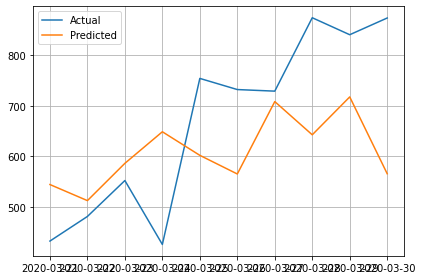

In [40]:
# plot Actual, Predicted
plt.plot(df_final['Actuals'], label='Actual')
plt.plot(df_final['Predictions'], label='Predicted')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## Different Batch Size

In [41]:
# train is from 0 to 683 test is from 683 to 749
train, test = df_day['ActivePower'][0:683], df_day['ActivePower'][683:749]
train.shape,test.shape

((683,), (65,))

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [43]:
# define a function to create X and y  sets from the  training dataset
# still need to reshape input to be 3D [samples, timesteps, features]

def split_X_y(df, n_steps_in, n_steps_out):
    X, y = [],[]
    for i in range(len(df)):
        # find the end of this pattern
        end_index = i + n_steps_in
        out_end_index = end_index + n_steps_out
        # check if we are beyond the sequence
        if out_end_index > len(df):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = df[i:end_index], df[end_index:out_end_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
# choose a number of time steps
n_steps_in, n_steps_out = 35, 30
# split into samples
X_train, y_train = split_X_y(train, n_steps_in, n_steps_out)
X_test, y_test   = split_X_y(test, n_steps_in, n_steps_out)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((619, 35, 1), (619, 30, 1), (1, 35, 1), (1, 30, 1))

In [45]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test  = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((619, 35, 1), (619, 30, 1), (1, 35, 1), (1, 30, 1))

In [51]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(n_steps_out)) 


In [52]:
4# Compile and run the model amd plot the loss function, num epochs set at 200 but early stopping means should not reach that
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) 
#  early stopping
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# fit network 
history = model.fit(X_train, y_train, epochs=200,verbose=0, batch_size=64, validation_split=0.2, shuffle=False, callbacks=[callbacks]) 

Epoch 135: early stopping


In [68]:
pred = model.predict(X_test, verbose=0)
pred = scaler.inverse_transform(pred)

In [69]:
df_final = pd.DataFrame(data={'Actuals':df_day['ActivePower'][718:748], 'Predictions':pred[0][0:30]}, index = df_day[718:748].index) 
df_final

,Actuals,Predictions
YearMonthDay,,
2020-03-01,443.058496,449.088470
2020-03-02,390.027361,666.361694
2020-03-03,341.133560,676.657532
2020-03-04,122.348957,615.879761
2020-03-05,676.893151,465.388489
2020-03-06,345.379836,695.438416
2020-03-07,516.674962,436.564911
2020-03-08,629.447133,389.615875
2020-03-09,673.519002,682.891479


In [80]:
print("Batch size of 64")
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))

Batch size of 64
The mean absolute error (MAE)                = 194.69
The RMSE error (RMSE)                        = 237.01


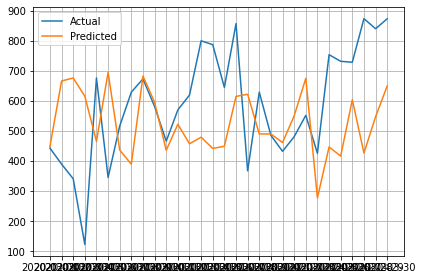

In [71]:
# plot Actual, Predicted
plt.plot(df_final['Actuals'], label='Actual')
plt.plot(df_final['Predictions'], label='Predicted')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [57]:
model1 = Sequential()

model1.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())

model1.add(LSTM(64, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())

model1.add(Dense(n_steps_out)) 


In [59]:
4# Compile and run the model amd plot the loss function, num epochs set at 200 but early stopping means should not reach that
model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) 
#  early stopping
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# fit network 
history = model1.fit(X_train, y_train, epochs=200,verbose=0, batch_size=128, validation_split=0.2, shuffle=False, callbacks=[callbacks]) 

In [64]:
pred2 = model1.predict(X_test, verbose=0)
pred2= scaler.inverse_transform(pred2)

In [74]:
df_final2 = pd.DataFrame(data={'Actuals':df_day['ActivePower'][718:748], 'Predictions':pred2[0][0:30]}, index = df_day[718:748].index) 
df_final2

,Actuals,Predictions
YearMonthDay,,
2020-03-01,443.058496,312.957001
2020-03-02,390.027361,117.458565
2020-03-03,341.133560,265.004974
2020-03-04,122.348957,179.935959
2020-03-05,676.893151,377.009552
2020-03-06,345.379836,-9.366898
2020-03-07,516.674962,209.108047
2020-03-08,629.447133,187.428116
2020-03-09,673.519002,286.880280


In [79]:
print("Batch size of 128")
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final2['Actuals'],df_final2['Predictions'],squared=False)))

Batch size of 128
The mean absolute error (MAE)                = 337.93
The RMSE error (RMSE)                        = 372.17


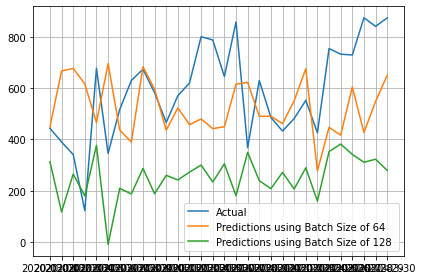

In [76]:
# plot Actual, Predicted
plt.plot(df_final['Actuals'], label='Actual')
plt.plot(df_final['Predictions'], label='Predictions using Batch Size of 64')
plt.plot(df_final2['Predictions'], label='Predictions using Batch Size of 128 ')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()